 # This is the answers to question 4 part 3

we are required to draw the density graph for Y and color in the rejection region

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Parameters
n = 20        
theta0 = 0.5     # H0: θ = 1/2
alpha = 0.05


In [44]:
c = 0.5 * (0.95 ** (1/n))
print("Critical value c:", c)

Critical value c: 0.49871931061173486


In [49]:
def f_Y(y, n, theta):
    y = np.array(y)
    return np.where((y >= 0) & (y <= theta), n * (y ** (n - 1)) / (theta ** n), 0)

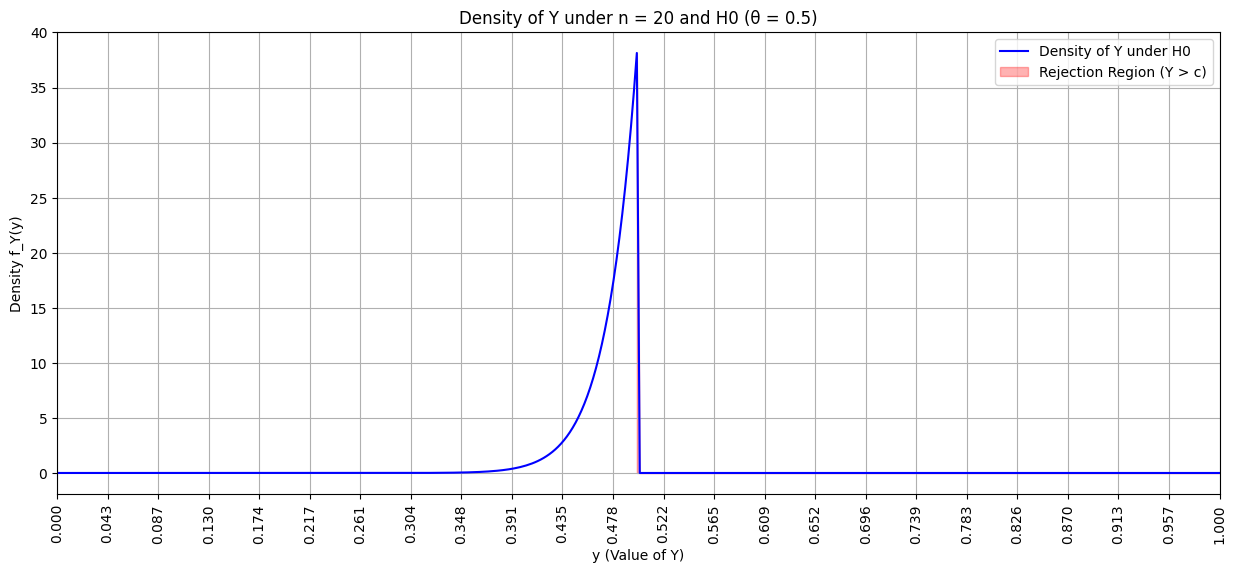

In [74]:
min_x_to_plot = 0
max_x_to_plot = 1

y_values = np.linspace(min_x_to_plot, max_x_to_plot, 400)
density_values = f_Y(y_values, n, theta0)

plt.figure(figsize=(15, 6))
plt.plot(y_values, density_values, label="Density of Y under H0", color="blue")
plt.fill_between(y_values, density_values, where=(c < y_values), color="red", alpha=0.3,
                 label="Rejection Region (Y > c)")
plt.title("Density of Y under n = 20 and H0 (θ = 0.5)")
plt.xlabel("y (Value of Y)")
plt.ylabel("Density f_Y(y)")
plt.xlim(min_x_to_plot, max_x_to_plot)
plt.xticks(np.linspace(min_x_to_plot, max_x_to_plot, 24),rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [75]:
def power_function(theta, c, n):
    beta = np.zeros_like(theta)
    valid = theta > c
    beta[valid] = 1 - (c/theta[valid])**n
    return beta

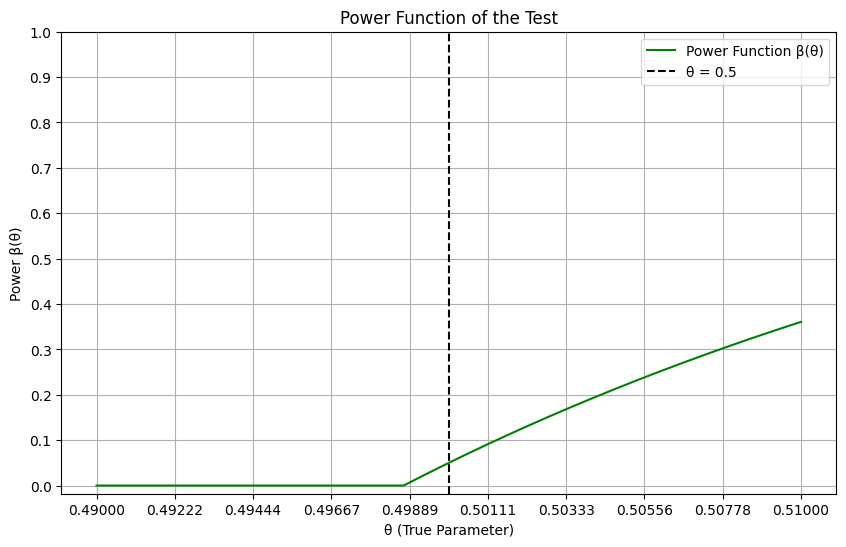

In [85]:
min_x_for_plot = 0.49
max_x_for_plot = 0.51

theta_range = np.linspace(min_x_for_plot, max_x_for_plot, 500)
power_vals = power_function(theta_range, c, n)

plt.figure(figsize=(10, 6))
plt.plot(theta_range, power_vals, label="Power Function β(θ)", color="green")
plt.axvline(x=theta0, color="black", linestyle="--", label="θ = 0.5")
plt.title("Power Function of the Test")
plt.xlabel("θ (True Parameter)")
plt.ylabel("Power β(θ)")
plt.xticks(np.linspace(min_x_for_plot, max_x_for_plot, 10))
plt.yticks(np.linspace(0, 1, 11))
plt.legend()
plt.grid(True)
plt.show()

In [91]:
theta_true = 0.75
power_at_theta_true = 1 - (c/theta_true)**n
print("Power of the test when θ = 0.75:", power_at_theta_true)

Power of the test when θ = 0.75: 0.9997143077731694
